# **AP155 Lab Assignment** 
## Module 3: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 15, 15, 15, 25, and 30 points, respectively).

_Due Date_: **5PM of November 9 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Vertudez, Genesis \
_Student No._: 202003099 \
_Section_: HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: Nov. 17, 2022

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** GENESIS R. VERTUDEZ

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **90**/100

Score breakdown:
* Problem 1 - 15/15
* Problem 2 - 15/15
* Problem 3 - 13/15
* Problem 4 - 21/25
* Problem 5 - 26/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (15 pts.; 50/50 for code & discussion) 
**Calculate the inverse of a matrix and LU decomposition**

1. Use numpy's $\tt linalg$ package to calculate the inverse of the ff. matrix *(5 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
4 & -2 & 1 \\
3 & 6 & -4 \\
2 & 1 & 8 
\end{pmatrix} \end{equation} $

2. Check your inverse in both directions; that is, check that ${\bf AA}^{−1} = {\bf A}^{−1}{\bf A} = {\bf I}$. Up to how many number of decimal places is this true? *(5 pts.)*

3. Let this matrix $\bf A$ be used to describe three simultaneous linear equations, ${\bf Ax = b}$. Solve for the vector $\bf x$ given
${\bf b} = \begin{pmatrix} 
12 \\ 
-25 \\ 
32 
\end{pmatrix}$ using: (i) the numerical inverse calculated in (1) and (ii) LU decomposition and backsubstitution with numpy's $\tt linalg$ package. *(5 pts. each)*


In [14]:
# import necessary packages

import numpy as np
from numpy import linalg as la
from mpl_toolkits import mplot3d as mp
import matplotlib.pyplot as plt

In [15]:
# 1.

A1 = np.array([[4,-2,1],[3,6,-4],[2,1,8]])        # create array of matrix A
A1_inv = la.inv(A1)                               # get inverse of A using numpy.linalg

print('Matrix A1:')
print(A1)
print('Inverse of matrix A1:')
print(A1_inv)

Matrix A1:
[[ 4 -2  1]
 [ 3  6 -4]
 [ 2  1  8]]
Inverse of matrix A1:
[[ 0.19771863  0.06463878  0.00760456]
 [-0.121673    0.11406844  0.07224335]
 [-0.03422053 -0.03041825  0.11406844]]


In [16]:
# 2.

Id = np.identity(3)        # create a 3x3 identity matrix
print('Identity matrix:')
print(Id)                  

A1_A1_inv = np.matmul(A1,A1_inv)     # multiply matrix A and inverse(A)
print('\nA A^-1:')
print(A1_A1_inv)

A1_inv_A1 = np.matmul(A1_inv,A1)     # multiply inverse(A) and matrix A
print('\nA^-1 A:')
print(A1_inv_A1)

print('\nAs we can see, this is accurate up to 10e-17 or the 16th deicmal place.')

Identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

A A^-1:
[[ 1.00000000e+00 -2.08166817e-17  0.00000000e+00]
 [-5.55111512e-17  1.00000000e+00  1.11022302e-16]
 [ 0.00000000e+00 -2.77555756e-17  1.00000000e+00]]

A^-1 A:
[[ 1.00000000e+00 -3.46944695e-18  5.55111512e-17]
 [ 8.32667268e-17  1.00000000e+00  1.11022302e-16]
 [ 2.77555756e-17  1.38777878e-17  1.00000000e+00]]

As we can see, this is accurate up to 10e-17 or the 16th deicmal place.


In [17]:
# 3.

b = np.array([12,-25,32])     # create an array of vector b

# (i)

x_by_inv = np.matmul(A1_inv, b)    # to get vector x, multiply by inverse(A) sa left, so that x remains on LHS
print('x by inverse of A:')
print(x_by_inv)

x_by_LU = la.solve(A1, b)          # use solve function from numpy.linalg
print('\nx by LU and backsubstitution:')
print(x_by_LU)

x by inverse of A:
[ 1. -2.  4.]

x by LU and backsubstitution:
[ 1. -2.  4.]


### PROBLEM 2 (15 pts.; 50/50 for code & discussion)

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(10 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3 
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(5 pts.)*

In [18]:
# 1.

A2 = np.array([[8,-2,-20],[-2,-3,-9],[-20,-9,-3]])       # create array of matrix A
print('Matrix A:')
print(A2)

e_vals, V = la.eigh(A2)        # get eigenvalues and eigenvectors using numpy.linalg
print('\nEigenvalues')
print(e_vals)
print('\nCorresponding eigenvectors:')
print(V)

D = np.zeros([3,3])            # initialize a 3x3 array
for i in range(len(D)):        # assign each eigenvalue to the diagonals of the array
    D[i,i] = e_vals[i]
    
# 2.
A2_V = np.matmul(A2, V)     # multiply matrix A and matrix V containing eigenvectors in columns
V_D = np.matmul(V, D)       # multiply matrix V and matrix D containing eigenvalues in diagonals

print('\nA2 V:')
print(A2_V)
print('\nV D')
print(V_D)
print('\nAs we can see, both produced equal matrices.')

Matrix A:
[[  8  -2 -20]
 [ -2  -3  -9]
 [-20  -9  -3]]

Eigenvalues
[-21.99606195   0.16021522  23.83584674]

Corresponding eigenvectors:
[[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]

A2 V:
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]

V D
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]

As we can see, both produced equal matrices.


### PROBLEM 3 (15 pts.; 50/50 for code & discussion)

**Physics Application: Rigid body rotations with matrices**

Consider the cube in this figure:

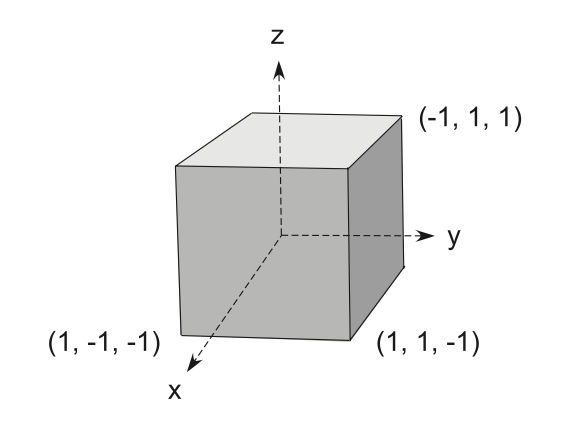

The cube has an inertia tensor for axes at the center:

$ \begin{equation} 
{\bf I} = 
\begin{pmatrix} 
2/3 & -1/4 & -1/4 \\
-1/4 & 2/3 & -1/4 \\
-1/4 & -1/4 & 2/3 
\end{pmatrix}. \end{equation} $

The cube is rotated with the three angular velocities:

$ \begin{equation} 
{\bf \omega} = 
\begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}, \ {\bf \omega} = 
\begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix} \ {\bf \omega} = 
\begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}
\end{equation} $

1. Compute the angular momentum vector $\bf L$ via the matrix multiplication ${\bf L} = {\bf I\omega}$ for each case. (5 pts.)

2. Make three 3-D plots for ${\bf \omega}$ and ${\bf L}$ for each case. Label and describe your plots clearly. (10 pts.)

In [19]:
# 1.

I = np.array([[2/3,-1/4,-1/4],[-1/4,2/3,-1/4],[-1/4,-1/4,2/3]])     # create array of matrix I
print('I:')
print(I)

w = np.array([[1,0,0],[0,1,0],[1,1,1]])     # create array of angular velocities in each row
print('\nAngular frequencies:')
print(w)
L = np.zeros([3,3])                         # initialize a 3x3 matrix

for i in range(len(w)):                     # multiply I to each angular velocity vector
    L[i] = np.matmul(I,w[i])                # assign each L to each row of the array L
print('\nAngular momenta:')
print(L)

I:
[[ 0.66666667 -0.25       -0.25      ]
 [-0.25        0.66666667 -0.25      ]
 [-0.25       -0.25        0.66666667]]

Angular frequencies:
[[1 0 0]
 [0 1 0]
 [1 1 1]]

Angular momenta:
[[ 0.66666667 -0.25       -0.25      ]
 [-0.25        0.66666667 -0.25      ]
 [ 0.16666667  0.16666667  0.16666667]]


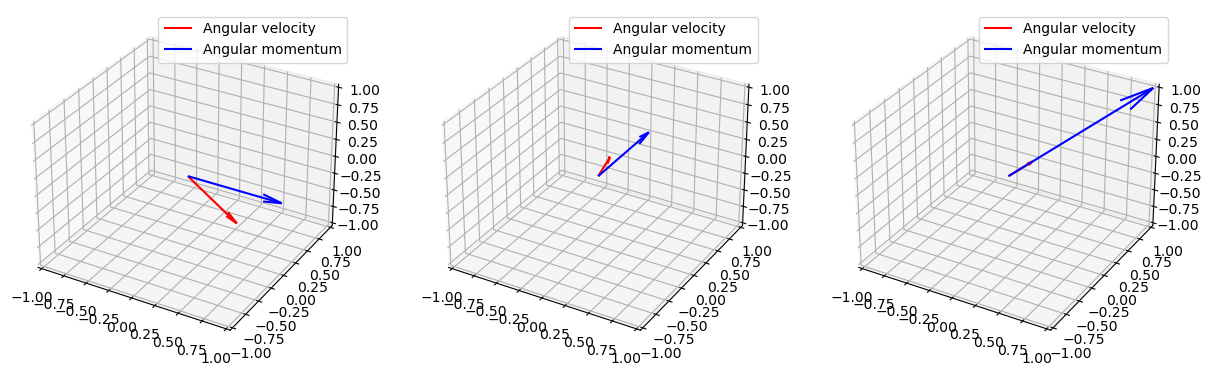

In [20]:
# 2.

fig = plt.figure(figsize=(15,5))

k = 131

for i in range(len(w)):
    ax = fig.add_subplot(k+i, projection='3d')
    ax.quiver(0, 0, 0, L[i][0], L[i][1], L[i][2], length=1, arrow_length_ratio=0.2, color='red', label='Angular velocity')
    ax.quiver(0, 0, 0, w[i][0], w[i][1], w[i][2], length=1, arrow_length_ratio=0.2, color='blue', label='Angular momentum')
    ax.set_xlim((-1,1))
    ax.set_ylim((-1,1))
    ax.set_zlim((-1,1))
    plt.legend()

### PROBLEM 4 (25 pts.; 50/50 for code & discussion)

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)* 

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(5 pts.)*

In [21]:
# 1.

epsilon = 10e-6                # define desired error

def f(x, c):                   # define the RHS of the nonlinear equation
    return 1-np.exp(-c*x)

x=1                            # initial test solution
c=2                            # for c=2
error = epsilon + 1            # initialize error > epsilon to start while loop

while error > epsilon:         # loop until error is less than or equal to desired error
    prev_x = x                 # store old value of x to a variable 
    x = f(x,c)                 # update value of x using the RHS function
    error = abs(x - prev_x)    # update error value which is difference from previous x value
print('Solution for c=2:')
print(x)                       # print the first value that stopped the loop, i.e., satisfied the desired error

Solution for c=2:
0.7968151643557075


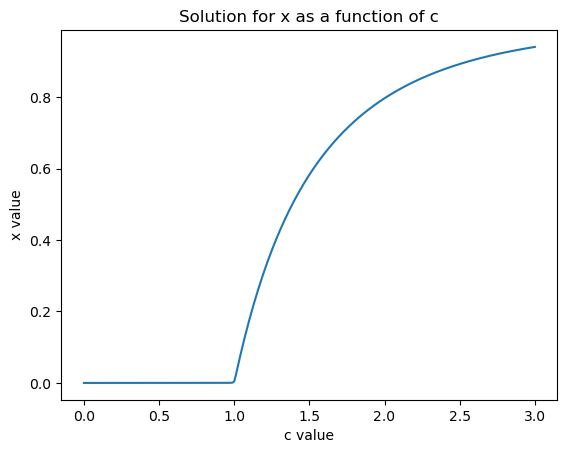

In [22]:
# 2
c_vals = np.arange(0,3.01,0.01)    # create array of the c values
x_vals = np.zeros(len(c_vals))     # initialize array for the x values
ctr = 0                            # set a counter that will be used for indexing the array of x values
for c in c_vals:                   # loop each c value
    
    # same process and while loop as above, but now inside a for loop to solve for each case of c value
    x=1                            
    error = epsilon + 1            
    while error > epsilon:        
        prev_x = x
        x = f(x,c)
        error = abs(x - prev_x)
        
    x_vals[ctr] = x   # after the while loop for each c, store the corresponding solution for x in the initialized array list
    ctr += 1          # update the counter for the index of next loop


fig, ax = plt.subplots()
ax.plot(c_vals, x_vals)
ax.set_xlabel('c value')                              # label of x axis
ax.set_ylabel('x value')                              # label of y axis
ax.set_title('Solution for x as a function of c')     # title of plot
plt.show()                                            # show plot

### PROBLEM 5 (30 pts.; 50/50 for code & discussion)

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. 

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use either one of (i) Newton's method or (ii) the secant method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures. (30 pts.) 

In [23]:
# define constants

G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6

def h(r):             # define the function
    return (G*M)/(r**2) - (G*m)/((R-r)**2) - (w**2)*r

def h_prime(r):       # define the derivative of the function (i did it manually)
    return (-2*G*M)/(r**3) - (2*G*m)/((R-r)**3) - w**2

error = epsilon + 1   # initialize error > epsilon to start while loop
r = 1                 # initial test solution

while error > epsilon:               # loop until error is less than or equal to desired error
    prev_r = r                       # store old value of r to a variable 
    r = r - (h(r))/(h_prime(r))      # calculate new estimate using formula from Newton's method
    error = abs(r - prev_r)          # update error
print('Distance from Earth to the Lagrange point L1:')
print(r)

Distance from Earth to the Lagrange point L1:
326045071.66535544
